In [14]:
import pandas as pd
from lightgbm import LGBMClassifier
import seaborn as sns
%matplotlib inline

In [136]:
df = pd.read_csv("train.csv", header=None)
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Oc','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']
order = [columns[-1]] + columns[:-1]
df.columns = columns
df['Above/Below 50K'] = df.apply(lambda row: 0 if row['Above/Below 50K'] == ' <=50K' else 1, 1)
df = df[order]

**Partial Dependency Plot Assumptions:**
* The assumption of independence is the biggest issue with PD plots. It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features.
* When the features are correlated, we create new data points in areas of the feature distribution where the actual probability is very low (for example it is unlikely that someone is 2 meters tall but weighs less than 50 kg).

https://christophm.github.io/interpretable-ml-book/pdp.html

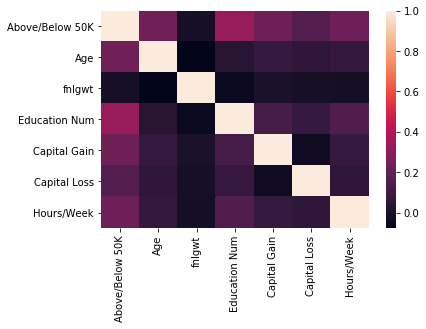

In [137]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [138]:
df = pd.get_dummies(df)

In [92]:
y = df[df.columns[0]].values
X = df[df.columns[1:]].values
clf = LGBMClassifier(n_jobs=-1, n_estimators=100).fit(X, y)

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [107]:
pdp_embark = pdp.pdp_isolate(
    model=clf, dataset=df[df.columns[1:]], model_features=df.columns[1:], 
    feature=[i for i in df.columns if 'Relationship' in i]
)

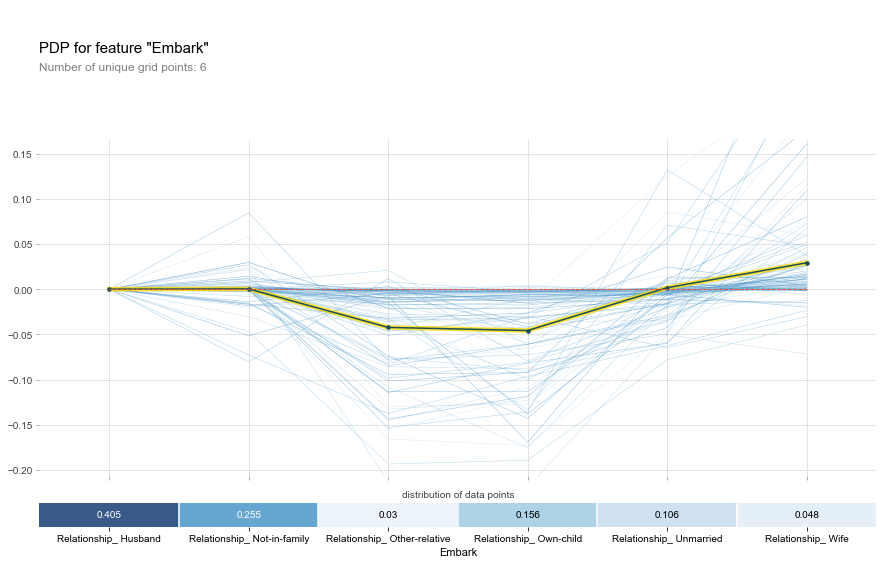

In [108]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True,
                        plot_params = {'xticks_rotation': 111120})

In [109]:
pdp_fare = pdp.pdp_isolate(
    model=clf, dataset=df[df.columns[1:]], model_features=df.columns[1:], feature='Age'
)

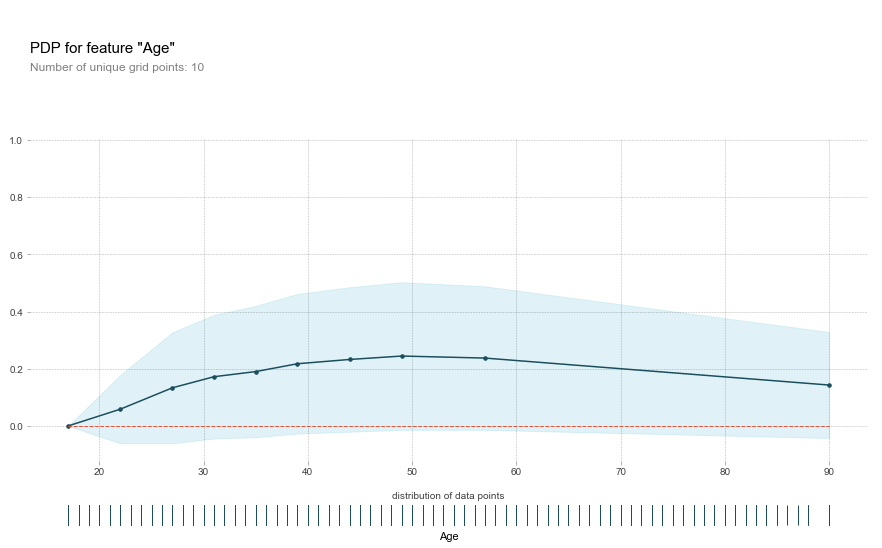

In [116]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Age', plot_pts_dist=True)

In [114]:
inter1 = pdp.pdp_interact(
    model=clf, dataset=df[df.columns[1:]], model_features=df.columns[1:], features=['Age', 'Hours/Week']
)

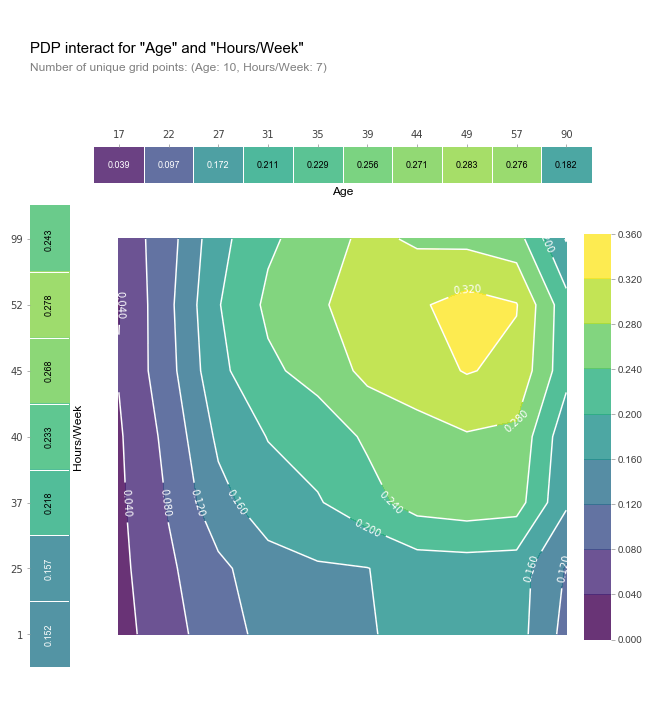

In [115]:
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=['Age', 'Hours/Week'], plot_type='contour', x_quantile=True, plot_pdp=True
)

**Solution to correlation**
* One solution to this problem is Accumulated Local Effect plots or short ALE plots that work with the conditional instead of the marginal distribution.

https://christophm.github.io/interpretable-ml-book/pdp.html